# Data Science for Business - Explaining House Prices

## Initialize notebook
Load required packages. Set up workspace, e.g., set theme for plotting and initialize the random number generator.

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
np.random.seed(42)
plt.style.use('fivethirtyeight')

## Case description

### Real Estate Appraisal

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 76 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset challenges you to explain the final price of each home. More: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>


## Load data

Load data from CSV file.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Session_03/ameshousing.csv')

In [4]:
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ThreeSsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,141,31770,Pave,none,IR1,Lvl,AllPub,Corner,...,0,0,0,none,0,5,2010,WD,Normal,215000
1,20,RH,80,11622,Pave,none,Reg,Lvl,AllPub,Inside,...,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
2,20,RL,81,14267,Pave,none,IR1,Lvl,AllPub,Corner,...,0,0,0,none,12500,6,2010,WD,Normal,172000
3,20,RL,93,11160,Pave,none,Reg,Lvl,AllPub,Corner,...,0,0,0,none,0,4,2010,WD,Normal,244000
4,60,RL,74,13830,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,3,2010,WD,Normal,189900
5,60,RL,78,9978,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,0,none,0,6,2010,WD,Normal,195500
6,120,RL,41,4920,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,4,2010,WD,Normal,213500
7,120,RL,43,5005,Pave,none,IR1,HLS,AllPub,Inside,...,0,144,0,none,0,1,2010,WD,Normal,191500
8,120,RL,39,5389,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,0,none,0,3,2010,WD,Normal,236500
9,60,RL,60,7500,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,6,2010,WD,Normal,189000


Perform a random train/test split.

In [5]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ThreeSsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
381,20,RL,80,10400,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,6,2009,WD,Family,152000
834,60,RL,0,28698,Pave,none,IR2,Low,AllPub,CulDSac,...,0,225,0,none,0,6,2009,WD,Abnorml,185000
1898,90,RL,70,9842,Pave,none,Reg,Lvl,AllPub,FR2,...,0,0,0,none,0,3,2007,WD,Normal,101800
678,90,RL,60,7200,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,6,2009,WD,Normal,90000
700,190,RM,63,7627,Pave,none,Reg,Lvl,AllPub,Corner,...,0,0,0,none,0,10,2009,WD,Normal,94550


In [7]:
data_train.shape

(2344, 77)

In [8]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF',

## Prepare data

Let us first focus on some easy to understand variables.

In [9]:
data_train = data_train[["SalePrice", "Neighborhood", "HouseStyle", "LotArea", "GrLivArea", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "OverallQual", "OverallCond"]]

In [10]:
data_train.head()

,SalePrice,Neighborhood,HouseStyle,LotArea,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,OverallQual,OverallCond
381,152000,NWAmes,1Story,10400,1370,2,3,1,7,5
834,185000,ClearCr,2Story,28698,2126,2,3,1,5,5
1898,101800,NAmes,1Story,9842,1224,2,2,2,4,5
678,90000,NAmes,1Story,7200,1040,2,2,2,4,5
700,94550,OldTown,2Story,7627,1701,2,4,2,4,6


## Exploratory data analysis

### Descriptive summary statistics

We can quickly calculate the most important summary statistics for a variable with *describe()*.

In [11]:
data_train["SalePrice"].describe()

,SalePrice
count,2344.000000
mean,178582.207765
std,77125.072713
min,12789.000000
25%,129000.000000
50%,160000.000000
75%,210000.000000
max,755000.000000


### Visualize distribution of single variables
In the following, we will use histograms and density plots to get a feeling of the distribution of our main variables. See https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot for more information.

Let's first look at the dependent variable (*SalePrice*).

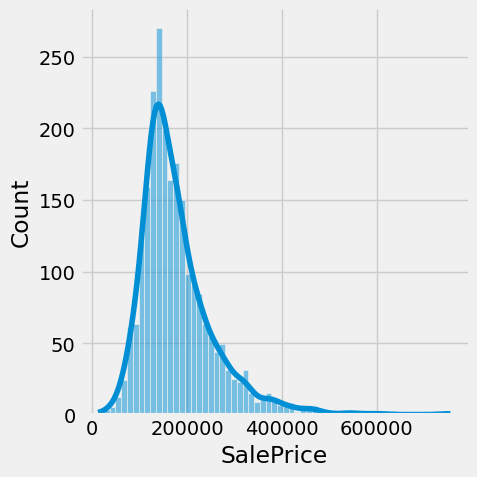

In [12]:
sns.displot(data_train, x="SalePrice", kde=True)
plt.show()

Let's look at some numerical independent variables. We will start with *GrLivArea*.

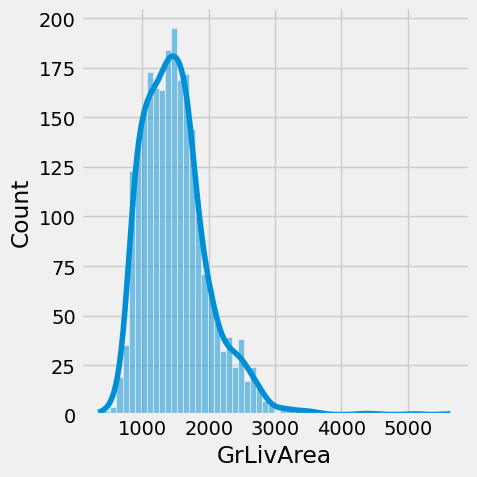

In [13]:
sns.displot(data_train, x="GrLivArea", kde=True)
plt.show()

Next, let's look at the variable *OverallQual*.

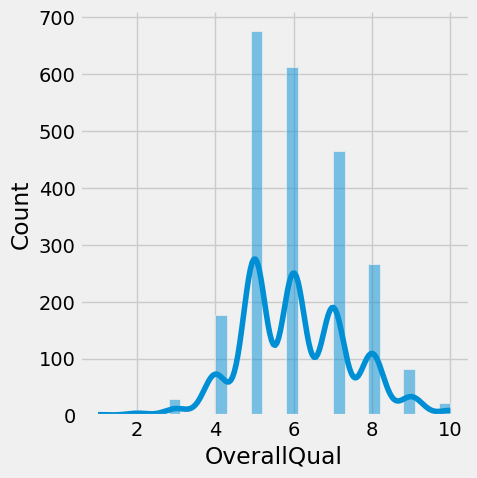

In [14]:
sns.displot(data_train, x="OverallQual", kde=True)
plt.show()

We can also visualize the distribution of categorical variables using *catplot()*. See https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot for more information.

Let's start with *Neighborhood*.

In [ ]:
sns.catplot(data_train, x="Neighborhood", kind="count")
plt.xticks(rotation=90)
plt.show()

Let's do the same for *HouseStyle*.

In [ ]:
# YOUR CODE HERE

### Visualize the relationship between the dependent variable (i.e., SalePrice) and numerical independent variables.

In the following, we will use scatter plots with linear trend lines to visually explore the relationship between *SalePrice* (Y axis) and various numerical independent variable (X axis). See https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot for more information.

*SalePrice* and *LotArea*.

In [ ]:
sns.relplot(data=data_train, x="LotArea", y="SalePrice", alpha=0.3)
plt.show()

The function *regplot()* is an alternative to *relplot()* that includes a linear regression model fit that can be drawn on the plot. See https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot for more information.

In [ ]:
sns.regplot(data=data_train, x="GrLivArea", y="SalePrice", scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.show()

### Visualize the relationship between the dependent variable (i.e., SalePrice) and categorical independent variables.

In the following, we will use multiple box plots to visually explore the relationship between *SalePrice* (Y axis) and various categorical independent variable (X axis).


*SalePrice* and *OverallQual*.

In [ ]:
sns.catplot(data=data_train, x="OverallQual", y="SalePrice", kind="box")
plt.show()

*SalePrice* and *OverallCond*.

In [ ]:
# YOUR CODE HERE

Violin plots are similar to box plots, except that they also show the probability density of the data at different values.

In [ ]:
sns.catplot(data=data_train, x="OverallCond", y="SalePrice", kind="violin", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

## Train linear models

After getting a feeling for the data, we are now ready to fit some linear regression models. We will use the *statsmodels* package, esp. the the formula API to be able to specify R-style formulas. See https://www.statsmodels.org/dev/example_formulas.html for more information.

#### Simple linear regression models

Let's start with a simple model that includes only one independent variable, e.g., *GrLivArea*.

In [ ]:
mod_01 = smf.ols(formula='SalePrice ~ GrLivArea', data=data_train)
mod_01 = mod_01.fit()
print(mod_01.summary())

Create a simple linear regression model with *BedroomAbvGr* as the only independent variable.

In [ ]:
# YOUR CODE HERE

#### Multiple linear regression models

Let's create a multiple linear regression model with both *GrLivArea* and *BedroomAbvGr* as independent variables.

In [ ]:
mod_03 = smf.ols(formula='SalePrice ~ GrLivArea + BedroomAbvGr', data=data_train)
mod_03 = mod_03.fit()
print(mod_03.summary2())

#### Categorical independent variables

Fit a linear regression model with a categorical independent variable (*HouseStyle*).

In [ ]:
mod_04 = smf.ols(formula='SalePrice ~ GrLivArea + BedroomAbvGr + HouseStyle', data=data_train)
mod_04 = mod_04.fit()
print(mod_04.summary2())

In [ ]:
data_train["HouseStyle"].value_counts()

#### Interaction effects

Fit a linear regression model with an interaction term between two numerical independent variables.


In [ ]:
mod_05 = smf.ols(formula='SalePrice ~ GrLivArea * LotArea', data=data_train)
mod_05 = mod_05.fit()
print(mod_05.summary2())

Fit a linear regression model with an interaction term between a categorical and numerical independent variable. In the formula API, the *C()* function can be used to indicate that a numerical variable should be treated as categorical.

In [ ]:
mod_05 = smf.ols(formula='SalePrice ~ GrLivArea * C(OverallQual)', data=data_train)
mod_05 = mod_05.fit()
print(mod_05.summary2())

#### Log-transformation of the DV

Fit a linear regression model with a logarithmic transformation of the dependent variable. With *np.log()* we can specify the transformation on the fly.


In [ ]:
mod_07a = smf.ols(formula='np.log(SalePrice) ~ BedroomAbvGr', data=data_train)
mod_07a = mod_07a.fit()
print(mod_07a.summary())

For comparison, the same model without the log-transformation.

In [ ]:
mod_07b = smf.ols(formula='SalePrice ~ BedroomAbvGr', data=data_train)
mod_07b = mod_07b.fit()
print(mod_07b.summary())

#### Polynomial transformation of the IVs

Fit a linear regression model with a second-order polynomial term (*GrLivArea*)

In [ ]:
mod_08 = smf.ols(formula='SalePrice ~ GrLivArea + GrLivArea^2', data=data_train)
mod_08 = mod_08.fit()
print(mod_08.summary())

### Make predicitons

Use a trained model to make predictions for the test set.

In [ ]:
preds = mod_03.predict(data_test)
preds

Calculate the test set RMSE.

In [ ]:
rmse = root_mean_squared_error(data_test["SalePrice"], preds)
print(rmse)